# Exercise 1

Use all feature selection methods to find the best features

## Dataset Information

## Features

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

## Target
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [152]:
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.linear_model import Lasso

In [153]:
housing = fetch_california_housing(as_frame=True)
df = pd.concat([housing.data, housing.target], axis=1)

In [165]:
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

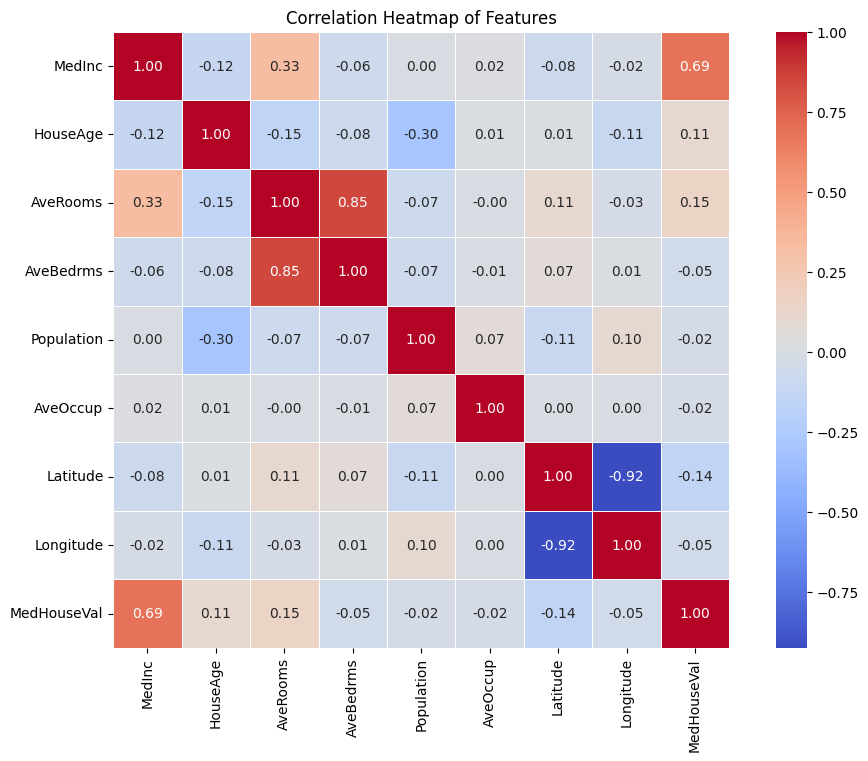

In [167]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

plt.title('Correlation Heatmap of Features')
plt.show()

In [166]:
mutual_info = mutual_info_regression(X, y)

In [156]:
mutual_info_df = pd.DataFrame(mutual_info, index=X.columns, columns=['Mutual Information'])
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)


In [157]:
selected_features = mutual_info_df.head(5).index
X_selected = X[selected_features]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

In [159]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [160]:
rmse_filter = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Filter RMSE: {rmse_filter}')

Filter RMSE: 0.7501796886976145


2. Use any wrapper method to select the best features

In [151]:
# put your answer here

model_rf = LinearRegression()

selector = RFE(model_rf, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

X_selected_rfe = X.iloc[:, selector.support_]

X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_selected_rfe, y, test_size=0.2, random_state=0)


model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)

rmse_wrapper = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
print(f'Wrapper RMSE: {rmse_wrapper}')


Wrapper RMSE: 0.7381906567166453


3. Use any embedded methood to select the best features

In [163]:
# put your answer here

lasso = Lasso(alpha=0.01)

lasso.fit(X, y)

selected_features_lasso = X.columns[lasso.coef_ != 0]


X_selected_lasso = X[selected_features_lasso]


X_train_lasso, X_test_lasso, y_train, y_test = train_test_split(X_selected_lasso, y, test_size=0.2, random_state=0)


lasso.fit(X_train_lasso, y_train)
y_pred_lasso = lasso.predict(X_test_lasso)

rmse_embedded = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f'Embedded RMSE: {rmse_embedded}')

Embedded RMSE: 0.7348086305495998


In [162]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model.fit(X_train_full, y_train)
y_pred_full = model.predict(X_test_full)

rmse_default = np.sqrt(mean_squared_error(y_test, y_pred_full))
print(f'Default RMSE: {rmse_default}')

Default RMSE: 0.7273129773603114
